# **Data Preparation** ⚡

### Senior Project by Phumphat A. & Sirapop N.








# **Import dataset and library**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Senior Project/Dataset/original_dataset.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [3]:
#Check total rows and columns in this df
df.shape

(65508, 5)

In [4]:
#Check datatype and missing value,we can notice that it has missing value now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65508 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65360 non-null  object
 1   label          65508 non-null  int64 
 2   prompt_name    65508 non-null  object
 3   source         65508 non-null  object
 4   RDizzl3_seven  65508 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.1+ MB


# **Data Cleaning**

## Deleting missing values

In [5]:
#Check many possible ways that It will be null

df[df['text'].isnull()].head()

,text,label,prompt_name,source,RDizzl3_seven
44918,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44944,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45059,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45074,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45089,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [6]:
df[df['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')].head()

,text,label,prompt_name,source,RDizzl3_seven
44920,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44936,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45169,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45275,,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45475,\n\n,1,Does the electoral college work?,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [7]:
# Drop rows where 'text' is NaN or None
df = df.dropna(subset=['text'])

# Drop rows where 'text' is an empty string or whitespace
df = df[df['text'].str.strip() != '']

In [8]:
#Check the shape of dataset
df.shape

(65328, 5)

In [9]:
#Checking that there is no more missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65328 non-null  object
 1   label          65328 non-null  int64 
 2   prompt_name    65328 non-null  object
 3   source         65328 non-null  object
 4   RDizzl3_seven  65328 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.6+ MB


## Detecting duplicated rows

In [10]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True]

,text,label,prompt_name,source,RDizzl3_seven


In [11]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True].shape

(0, 5)

In [12]:
df1 = df[['text','label']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65328 non-null  object
 1   label   65328 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


## Solving the mistake from the AI-Generated text

> Thanks for the kaggle notebook [Cleaning Dataset](https://www.kaggle.com/code/nbroad/clean-llama-70b-data/notebook#Mistake-2:-Inserting-in-section-names-like-%22Introduction%22-%22Body%22-%22Conclusion%22)



### Please provide feedback
Since after the AI generated the essay, it will close like "please provide feedback", etc. which the author didn't delete those phase. So we need to delete the phase after those words.



In [13]:
import re
patterns = [
        "Please grade this",
        "Please provide feedback",]

# Combine patterns into a single regex pattern using alternation (|)
combined_pattern = '|'.join([re.escape(pattern) for pattern in patterns])

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(81, 2)

In [14]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)]['label'].value_counts()

,count
label,
1,81


In [15]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].head()

,text,label
26037,I think we should totes switch to renewable en...,1
26360,I think that distance learning is a good idea ...,1
26743,Minimum wage is a big issue in many countries....,1
26924,I think there defintely shuld be stronger priv...,1
26953,Gun control is a really big issue in lots of p...,1


In [16]:
# Apply the replacement
df1['text'] = df1['text'].apply(lambda x: re.split(combined_pattern, x)[0] if isinstance(x, str) else x)

<ipython-input-16-43cd58028fb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(lambda x: re.split(combined_pattern, x)[0] if isinstance(x, str) else x)


In [17]:
#Check the row that has change
df1.iloc[26924,0]

"I think there defintely shuld be stronger privacy protections on sicial media. I mean, like, think about it, we're sharing like, everything about our lives on line and anyone can see it. Its like, super easy for peoples personal info to get out thier and once its out thier, its out thier. You cant like, take it back or anything. And its not just, like, random peoples who can see it, its also like, companies and stuff. They can use our personal info to like, sell us stuff and stuff and its just, really not cool.\n\nLike, I know some peoples who have had theyre identities stolen and its like, super hard to get it back. And like, they have to deal with alot of problems because of it. And its not just, like, them, it could happen to anyone. So yeah, I think we defintely need stronger privacy protections on sicial media.\n\nI also think that like, companies shouldnt be able to use our personal info without our permision. Its like, not fair that they can just, take our info and use it to ma

### "Introduction" "Body" "Conclusion"

In [18]:
patterns = [
        r"Introduction:",
        r"Body:",
        r"Conclusion:",
        r"Claim:",
        r"Evidence:",
        r"Evidence from the article:",
        r"Title:"
    ]

# Combine patterns into a single regex pattern using alternation (|)
combined_pattern = '|'.join([re.escape(pattern) for pattern in patterns])

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(2709, 2)

In [19]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[(df1['text'].str.contains(combined_pattern, regex=True, case=False)) & (df1['label'] == 1)].shape

(2680, 2)

In [20]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[(df1['text'].str.contains(combined_pattern, regex=True, case=False)) & (df1['label'] == 1)].head(100)

,text,label
26003,"Introduction:\n\nThe author of ""The Challenge ...",1
26010,Title: The Pros and Cons of a Four-Day Work We...,1
26028,Title: The Importance of Coding and Teamwork i...,1
26072,Claim: The author effectively supports the ide...,1
26097,Title: The Formation of Character Traits: The ...,1
...,...,...
29593,Introduction: Have you ever wanted to go on an...,1
29610,"Introduction:\n\nHey there, fellow students! I...",1
29624,Title: The Benefits of Pairing Older and Young...,1
29628,Introduction:\n Hey there! I came across an ar...,1


In [21]:
# Function to remove the patterns from text
def remove_patterns(text):
    return re.sub(combined_pattern, '', text, flags=re.IGNORECASE).strip()

# Apply the function to the rows that match the condition
df1.loc[(df['text'].str.contains(combined_pattern, regex=True, case=False)),'text'] = df1.loc[(df['text'].str.contains(combined_pattern, regex=True, case=False)),'text'].apply(remove_patterns)

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(0, 2)

In [22]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False) & (df1['label'] == 1)].shape

(0, 2)

In [23]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False) & (df1['label'] == 1)].head()

,text,label


### [Name]

In [24]:
# Define the pattern to find text within square brackets
pattern = r'\[.*?\]'

# Filter DataFrame for rows that contain text with square brackets
df1[df1['text'].str.contains(pattern, regex=True)].shape

(3640, 2)

In [25]:
df1[df1['text'].str.contains(pattern, regex=True)]['label'].value_counts()

,count
label,
1,3311
0,329


In [26]:
pattern = "Name]"
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

(3130, 2)

In [27]:
df1[df1['text'].str.contains(pattern, regex=True, case=False) & (df1['label'] == 1)].shape

(3118, 2)

In [28]:
df1[df1['text'].str.contains(pattern, regex=True, case=False) & (df1['label'] == 0)]

,text,label
107,"Required Essay: Phones & Driving\n\nToday, the...",0
157,Phones While Driving: The Dangers\n\nPhones wh...,0
280,Phones & Driving: By: PROPER_NAME\n\nDrivers s...,0
481,Phones & Driving\n\nDrivers shouldn't be able ...,0
564,Phones and Driving\n\nCell phone have become v...,0
608,CELL PHONES: The Killer Distraction\n\nWe live...,0
762,Drivers shouldn't be able to use their phones ...,0
798,Phones and Driving\n\nCell phones have become ...,0
888,Phones and Driving\n\nCell Phones have become ...,0
1078,Phones and Driving\n\nMany people use their ph...,0


In [29]:
df1[df1['text'].str.contains(pattern, regex=True, case=False) & (df1['label'] == 1)].head()

,text,label
26024,"Dear Principal Johnson, \n\nI am writing to yo...",1
26029,"Dear Principal,\n\nI am writing to you regardi...",1
26073,"Dear Principal,\n\nI am writing to you about t...",1
26080,I think that we should raise the minimum wage ...,1
26101,"Dear Principal, \n\nI am writing to respectful...",1


In [30]:
def remove_name(text):
    patterns = [
        r"\[Name\]",
        r"\[Your name\]",
        r"\[Last name\]"
    ]

    for p in patterns:
        text = re.sub(p, "", text, flags=re.IGNORECASE)

    return text.strip()

# Apply the remove_name function to the 'text' column
df1['text'] = df1['text'].apply(remove_name)
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

<ipython-input-30-3640e9adaa52>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_name)


(570, 2)

In [31]:
df1[df1['text'].str.contains(pattern, regex=True, case=False)].head()

,text,label
12598,"""The Face"" Is Not A Face\n\nThe 1998 dicovery ...",0
14688,"Dear TEACHER_NAME,\n\nI think the idea of stud...",0
26187,"[Your Address]\n[City, State, ZIP]\n[Email Add...",1
26243,"[Your Address]\n[Your City, State ZIP Code]\n[...",1
26258,"[Student's Name]\n[Address]\n[City, State ZIP ...",1


In [32]:
def remove_name(text):
    patterns = [
        r"\[TEACHER_NAME\]",
        r"\[Your Address\]",
        r"\[City, State, ZIP\]",
        r"\[Email Address\]",
        r"\[Date\]",
        r"\[State Senator's Name\]",
        r"\[Address\]",
        r"\[Last name\]",
        r"\[Last name\]",
        r"\[Last name\]",

    ]

    for p in patterns:
        text = re.sub(p, "", text, flags=re.IGNORECASE)

    return text.strip()

# Apply the remove_name function to the 'text' column
df1['text'] = df1['text'].apply(remove_name)
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

<ipython-input-32-da143850c1e7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_name)


(452, 2)

In [33]:
df1.iloc[26187,0]

"Subject: The Importance of the Electoral College in Presidential Elections\n\nDear ,\n\nI hope this letter finds you well. I am writing to express my support for the Electoral College and advocate against the idea of changing to a popular vote system for the election of the President of the United States. The Electoral College plays a crucial role in maintaining our democratic process and upholding the principles on which our founding fathers established this nation.\n\nFirst and foremost, the Electoral College ensures certainty of outcome. With the winner-take-all system, the winning candidate's share of the Electoral College invariably exceeds their share of the popular vote, providing a clear and decisive outcome. As witnessed in the 2012 election, President Obama received 61.7% of the electoral vote, compared to only 51.3% of the popular vote. This system minimizes the likelihood of a disputed election and provides a stable framework for the American people.\n\nAnother important a

In [34]:
df1[df1['text'].str.contains(pattern, regex=True, case=False)].head(10)

,text,label
12598,"""The Face"" Is Not A Face\n\nThe 1998 dicovery ...",0
26243,"[Your City, State ZIP Code]\n[Your Email]\n\n\...",1
26258,"[Student's Name]\n\n[City, State ZIP Code]\n\n...",1
26299,[Phone Number]\n\n \n[Senator’s Name]\n[Senato...,1
26346,[Phone Number]\n\n\n[Senator's Name]\n[State S...,1
26458,"[City, State ZIP]\n\n[Phone Number]\n\n\n[Sena...",1
26473,[Phone Number]\n\n\n[Senator's Name]\n\n\n\nDe...,1
26487,"[City, State, ZIP Code]\n\n\n[Senator's Name]\...",1
26491,[Phone Number]\n\n\n[Senator's Name]\n[Senator...,1
26523,[Phone Number]\n\n\n[Senator's Name]\n\n\n\nSu...,1


In [35]:
def remove_name(text):
    patterns = [
        r"\[Your City, State ZIP Code\]",
        r"\[Your Email\]",
        r"\[Principal’s Name\]",
        r"\[School Name\]",
        r"\[School Address\] ",
        r"\[City, State ZIP Code\]",
        r"\[Principal’s Name\]",
        r"\[Your signature\]",
        r"\[Student's Name\]",
        r"\[Senator's Name\]",
        r"\[Senator’s Name\]",
        r"\[Phone Number\]",
        r"\[Senator’s Address\]",
        r"\[State Senator\]",
        r"\[Senator's Last Name\]",
        r"\[Your Grade\]",
        r"\[Principal's name\]",
        r"\[grade\]",
        r"\[State Senate Address\]",
        r"\[State Senator's Last Name\]",
        r"\[School's Name\]",
        r"\[State Capitol\]",
        r"\[insert your position\]",
        r"\[Sender Name\]",
        r"\[Senator's Address\]",
        r"\[Senator’s Last Name\]",
        r"\[Your School\]",
        r"\[state name\]",
        r"\[City, State, ZIP Code\]",
        r"\[Senator's Surname\]",
        r"\[Your Teacher's Name\]",

    ]

    for p in patterns:
        text = re.sub(p, "", text, flags=re.IGNORECASE)

    return text.strip()

# Apply the remove_name function to the 'text' column
df1['text'] = df1['text'].apply(remove_name)
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

<ipython-input-35-a4fb7808ef48>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_name)


(138, 2)

In [36]:
df1[df1['text'].str.contains(pattern, regex=True, case=False)].head(10)

,text,label
12598,"""The Face"" Is Not A Face\n\nThe 1998 dicovery ...",0
27447,"Dear Principal,\n\nI strongly believe that our...",1
30212,"Dear Employer,\n\nI am writing to express my i...",1
30611,"As an eighth-grade student, I am excited to ap...",1
32037,[Principal Name]\n\n\n\n\nDear [Principal Name...,1
32128,Exploring Career Opportunities in Landscape De...,1
32739,"Dear [Teacher's Name],\n\nI am writing to expr...",1
32740,"Dear [Manager's Name],\n\nI am writing to expr...",1
33007,[State Senator’s Name]\n[State Senator’s Addre...,1
33290,"Hello, my name is . I come from [Your Hometown...",1


In [37]:
# Define the pattern to find text within square brackets
pattern = r'\[.*?\]'

# Filter DataFrame for rows that contain text with square brackets
df1[df1['text'].str.contains(pattern, regex=True)].shape

(675, 2)

In [38]:
df1[(df1['text'].str.contains(pattern, regex=True)) & (df1['label'] == 1)].shape

(359, 2)

In [39]:
df1[(df1['text'].str.contains(pattern, regex=True)) & (df1['label'] == 1)]

,text,label
26243,"[School Address]\n\n\nDear ,\n\nI am writing t...",1
26296,"Dear principal,\n\nI am a ninth-grade student ...",1
26373,[State Senator's Address]\n\n\nSubject: Suppor...,1
26384,[State Senator's Address]\n\n\nSubject: Keepin...,1
26458,"[City, State ZIP]\n\n\n\n\n\n\n[City, State ZI...",1
...,...,...
65313,"Driverless cars are coming, and there is no do...",1
65434,"Dear [Name of State Senator],\n\nI am writing ...",1
65456,"Dear Senator ____________,\n\nI am a high scho...",1
65497,"Dear Senator [insert name],\n\nAs a high schoo...",1


In [40]:
# Define the pattern to match text inside square brackets
pattern = r'\[.*?\]'

# Replace text inside square brackets (including the brackets) with an empty string
df1.loc[(df1['text'].str.contains(pattern, regex=True)) & (df1['label'] == 1), 'text'] = df1.loc[(df1['text'].str.contains(pattern, regex=True)) & (df1['label'] == 1), 'text'].str.replace(pattern, '', regex=True)

In [41]:
df1.iloc[26296,0]

'Dear principal,\n\nI am a ninth-grade student and I am writing about the proposed policy to only allow students with a grade B or better average to participate in sports and other activities. I understand that you want us to focus on our studies, but I think this policy is not fair because it will discourage many students.\n\nFirstly, not every student is good at all subjects. It is unfair to punish a student who is good at sports or other activities because of their grades in other classes that might not be their strengths. For example, a student may be an excellent athlete and have an A or B in Physical Education but struggle with Math and Science, resulting in a grade C. This does not mean they should not be allowed to participate in sports or other activities, as it may be their passion and a way to relieve stress.\n\nSecondly, sports and activities can also help improve our grades. Being part of a team or club can help us learn time management skills, which can help us balance ou

### Note

In [42]:
pattern = "Note:"

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

(61, 2)

In [43]:
df1[df1['text'].str.contains(pattern, regex=True, case=False)]['label'].value_counts()

,count
label,
1,61


In [44]:
def remove_note(text):
    """
    Removes everything after "Note:" or "Please note:" in a case-insensitive manner.
    """
    # Define the patterns to match "Note:" or "Please note:" case-insensitively
    patterns = [
        r"Note:",
        r"Please note:"
    ]

    # Combine patterns into a single regex with case-insensitive flag
    combined_pattern = '|'.join(patterns)

    # Search for the pattern in a case-insensitive way
    match = re.search(combined_pattern, text, flags=re.IGNORECASE)

    if match:
        # Slice the text to remove everything after the match
        text = text[:match.start()]

    return text.strip()

# Apply the remove_name function to the 'text' column
df1['text'] = df1['text'].apply(remove_note)
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

<ipython-input-44-c8f932dfc22f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(remove_note)


(0, 2)

In [45]:
df1.iloc[26385,0]

'Single-use plastics have been a major issue for our environment and oceans. Plastics such as bags, straws, and water bottles are used once and then discarded, often ending up in the ocean or in landfills. This has led to the suffering of marine life and birds who mistake the plastic as food and eat it which causes harm to their bodies.\n\nOne of the main reasons why single-use plastics should be banned is that they are not biodegradable. This means that they will not break down naturally in the environment and will remain there for hundreds of years. For example, plastic bags can take up to 1,000 years to decompose. This is a major problem because it means that the plastic waste that we produce today will still be here in the future, polluting our planet.\n\nAnother reason to ban single-use plastics is that they are not recyclable. Many people think that recycling is the solution to the plastic problem, but the truth is that most plastics cannot be recycled. For example, plastic bags 

### Check the result again

In [46]:
df1[df1['label'] == 1].shape

(37957, 2)

In [47]:
df1[df1['label'] == 1].head(1000)

,text,label
25996,"In recent years, technology has had a profound...",1
25997,I strongly believe that meditation and mindful...,1
25998,One way school administrators can attempt to c...,1
25999,While summer is meant as a break from the regu...,1
26000,The use of Facial Action Coding System (FACS) ...,1
...,...,...
26991,Homwork. Is it good or bad? I think homwork is...,1
26992,I think that the principal's idea of making us...,1
26993,Individual competition in the workplace is a t...,1
26994,"As any writer knows, it’s important to have a ...",1


###The dash '--'

In [48]:
df1[(df1['label'] == 1) & (df1['text'].str.contains(r'--', regex=True))].head(1000)

,text,label
26076,of technology on our daily lives and the impor...,1
26211,"Since the dawn of time, people have realized t...",1
26457,I'm looking forward to visiting LOCATION_NAME ...,1
26833,"Today, we're going to talk about two very impo...",1
27412,---\n\nThe article “Driverless Cars are Coming...,1
...,...,...
61360,Is it really necessary to say that car usage i...,1
61371,"In today's society, where information is so im...",1
61448,"In the article, ""A Cowboy Who Rode the Waves.""...",1
63562,Cowboys have been a part of the American West ...,1


In [49]:
# Replace more than one consecutive '-' with an empty string
df1['text'] = df1['text'].str.replace(r'-{2,}', '', regex=True)

<ipython-input-49-caf8a6da47fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].str.replace(r'-{2,}', '', regex=True)


In [50]:
df1.iloc[26833,0]

'Today, we\'re going to talk about two very important operations - multiplying and dividing. We use multiplying and dividing to do calculations quickly and solve problems in the real world. \n\nLet\'s use an example to show how multiplying and dividing is faster than using adding and subtracting. Imagine that you have 10 apples and want to give them all to your friends. With adding and subtracting, you\'d need to find the total of how many apples you have, and then take that total and divide it by 10 to figure out how much each friend will get. That\'s a lot of work!\n\nBut with multiplying and dividing, you can solve the problem much faster. You can just divide 10 by the number of friends you have  let\'s say three friends here. That means you can say "each friend will get three apples" without doing any adding or subtracting!\n\nSo, as you can see, using multiplying and dividing can be a great way to solve problems quickly and efficiently  so let\'s get to it and start learning!'

In [51]:
#Regular expression to match emojis
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"  # Enclosed Characters
    "]+", flags=re.UNICODE)

# Function to check for emojis
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Apply the function to the DataFrame
df1['contains_emoji'] = df1['text'].apply(contains_emoji)
df1[df1['contains_emoji'] == True]

<ipython-input-51-c6a99c4046c8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contains_emoji'] = df1['text'].apply(contains_emoji)


,text,label,contains_emoji
26021,"Hey there, it's me, an average 8th grade stude...",1,True
26027,"Okay, here's my attempt at writing an essay as...",1,True
26063,"Okay, here is my attempt at writing an essay r...",1,True
26089,"Hey there! So, I've been tasked with research...",1,True
26127,"Hey, it's me, your average 8th grade student! ...",1,True
...,...,...,...
56750,"Hey there, young adventurers! Have you ever dr...",1,True
61829,"Driverless cars are coming, so why not now?\nT...",1,True
61846,"Driverless cars are coming, and they are a gre...",1,True
61856,Driverless cars seem to be a future where ever...,1,True


In [52]:
# Replace emojis with an empty string
df1['text'] = df1['text'].str.replace(emoji_pattern, '', regex=True)

# Apply the function to the DataFrame
df1['contains_emoji'] = df1['text'].apply(contains_emoji)
df1[df1['contains_emoji'] == True]

<ipython-input-52-79ec57263894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].str.replace(emoji_pattern, '', regex=True)
<ipython-input-52-79ec57263894>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contains_emoji'] = df1['text'].apply(contains_emoji)


,text,label,contains_emoji


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            65328 non-null  object
 1   label           65328 non-null  int64 
 2   contains_emoji  65328 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 1.6+ MB


In [54]:
df1 = df1[['text','label']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65328 non-null  object
 1   label   65328 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [55]:
df1[df1['label'] == 1].shape

(37957, 2)

In [56]:
df1[df1['label'] == 1].head(1000)

,text,label
25996,"In recent years, technology has had a profound...",1
25997,I strongly believe that meditation and mindful...,1
25998,One way school administrators can attempt to c...,1
25999,While summer is meant as a break from the regu...,1
26000,The use of Facial Action Coding System (FACS) ...,1
...,...,...
26991,Homwork. Is it good or bad? I think homwork is...,1
26992,I think that the principal's idea of making us...,1
26993,Individual competition in the workplace is a t...,1
26994,"As any writer knows, it’s important to have a ...",1


In [57]:
df.iloc[26145,0]

'an online learning environment.\n\nDistance/online learning has become increasingly popular in recent years, and for good reason. While there are certainly advantages and disadvantages to this type of education, it is clear that it has the potential to be incredibly beneficial for students around the world who cannot access a physical school.\n\nOne of the biggest advantages of distance learning is the flexibility it offers. Students can learn at their own pace, on their own schedule, and from anywhere with an internet connection. This is particularly important for students who live in remote areas or have other obligations that make it difficult to attend traditional school. In addition, distance learning can be more affordable than traditional schooling, as students do not have to pay for transportation, housing, or other expenses associated with attending a physical school.\n\nHowever, there are also some disadvantages to distance learning. One of the biggest challenges is the lack

In [58]:
df1[df1['text'].str.contains('Subject:')]['label'].value_counts()

,count
label,
1,161


In [59]:
# Replace emojis with an empty string
df1['text'] = df1['text'].str.replace('Subject:', '', regex=True)
df1[df1['text'].str.contains('Subject:')]

,text,label


In [68]:
# Define a regex pattern to check for multiple spaces
pattern = r' {2,}'  # Matches two or more consecutive spaces

# Check if there are rows with multiple spaces
df1[df1['text'].str.contains(pattern, regex=True)].head()

,text,label,word_count
40,Although cell phones have not been around for ...,0,560
323,Everyday people die in car accidents because t...,0,329
1117,"Phones & Driving\n\nOver the past decade, tech...",0,1050
1347,Could you imagine what it would be like if we ...,0,440
1534,"We use them everyday, they get us to our desti...",0,709


In [69]:
# Function to clean text by removing multiple spaces
def clean_text(text):
    return " ".join(text.split())

# Apply the function to clean the 'text' column
df1['text'] = df1['text'].apply(clean_text)

In [70]:
df1.iloc[40,0]

"Although cell phones have not been around for a very long time, they have become mandatory in most of our lives. Smartphones are a class of mobile phones and of multi-purpose mobile computing devices. They are distinguished from feature phones by their stronger hardware capabilities and extensive mobile operating systems, which facilitate wider software, internet (including web browsing over mobile broadband), and multimedia functionality (including music, video, cameras, and gaming), alongside core phone functions such as voice calls and text messaging. Smartphones Were founded in 1992. Since smartphones were created every year they get more modern. For example june 7, 2010 facetime was created. The smartphone is changing the human race in surprising ways. Driving and using your cell phone at the same time is very dangerous. Most people think that they can drive so being on their phone while driving wont hurt anybody or anything, but anybody who agrees with this is wrong and is in da

In [81]:
# Define the regex pattern to check for multiple consecutive '!' or '.'
pattern = r'[!.]{2,}'

# Find rows where the pattern exists
df1[df1['text'].str.contains(pattern, regex=True)].head()

,text,label,word_count
19,Should Drivers Be Allowed To Use Cell Phones W...,0,362
24,Everyday people die in car accidents because t...,0,508
26,BOOM!! You're on I-75 on the ground bleeding o...,0,321
69,Phones and Driving On a daily basis the majori...,0,173
79,"Ever since phones have entered into the world,...",0,502


In [84]:
df1.to_csv('final_cleaned.csv',index = False)

In [71]:
def word_count(text):
    list1 = text.split()
    return len(list1)

In [72]:
df1['word_count'] = df1['text'].apply(word_count)
df1['word_count'].max()

1656

In [73]:
percentiles = df1['word_count'].quantile([0.1, 0.25, 0.5, 0.75,0.8,0.85, 0.9,1])

print(percentiles)

0.10     209.0
0.25     282.0
0.50     368.0
0.75     473.0
0.80     508.0
0.85     556.0
0.90     625.0
1.00    1656.0
Name: word_count, dtype: float64


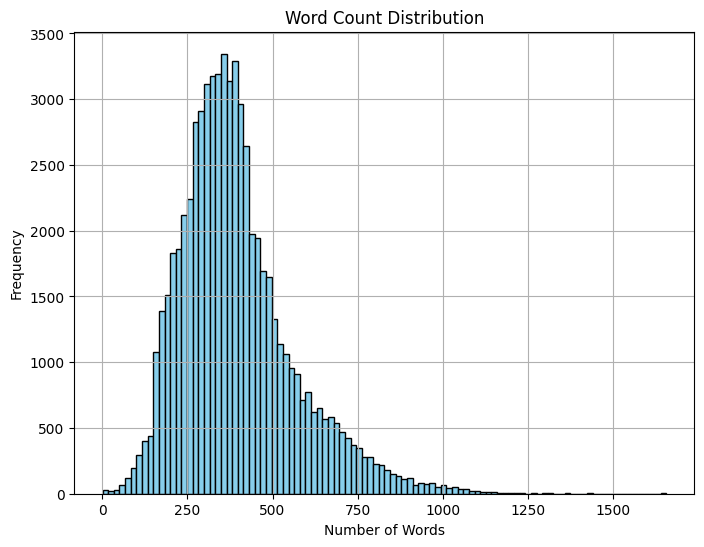

In [78]:
import matplotlib.pyplot as plt

# Plot the word count distribution
plt.figure(figsize=(8, 6))
plt.hist(df1['word_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [74]:
df1[df1['word_count'] == 1656]

,text,label,word_count
5736,I thought it might be boring and a lot of work...,0,1656


In [75]:
df1[df1['word_count'] > 512].shape

(12674, 3)